# Explore exercises

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Read in the cached dataset
df = pd.read_csv('zillow.csv', index_col='Unnamed: 0')

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
#Check the information contained in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52319 entries, 0 to 52318
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52319 non-null  int64  
 1   parcelid                      52319 non-null  int64  
 2   airconditioningtypeid         13615 non-null  float64
 3   architecturalstyletypeid      70 non-null     float64
 4   basementsqft                  47 non-null     float64
 5   bathroomcnt                   52319 non-null  float64
 6   bedroomcnt                    52319 non-null  float64
 7   buildingclasstypeid           0 non-null      float64
 8   buildingqualitytypeid         33654 non-null  float64
 9   calculatedbathnbr             52184 non-null  float64
 10  decktypeid                    389 non-null    float64
 11  finishedfloor1squarefeet      4371 non-null   float64
 12  calculatedfinishedsquarefeet  52238 non-null  float64
 13  f

In [4]:
#Create an age feature
df['age'] = 2017 - df['yearbuilt']

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,age
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,19.0
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,50.0
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,55.0
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,47.0
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,67.0


In [5]:
#Check for null values in my new future
df[df['age'].isna()]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,age
124,2546776,14190895,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,-0.001296,2017-01-03,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN
714,722877,12281458,NaN,NaN,NaN,1.0,2.0,NaN,4.0,1.0,...,0.111950,2017-01-05,NaN,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN,NaN
2602,496818,11696784,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,-0.124790,2017-06-16,NaN,NaN,NaN,Floor/Wall,Single Family Residential,NaN,NaN,NaN
3305,1580385,14197244,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,0.014172,2017-01-24,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN
3513,338423,13850462,NaN,NaN,NaN,1.0,3.0,NaN,NaN,1.0,...,0.026100,2017-01-25,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48475,2683968,14341510,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,2.389413,2017-08-30,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN
49568,1640344,14115687,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,-0.099231,2017-09-02,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN
49956,2117639,17292931,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,0.080163,2017-09-06,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN
50235,388588,17202394,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,-0.075827,2017-09-07,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,NaN


In [6]:
#Impute with the median
df['age'].fillna(df['age'].median(), inplace=True)

In [7]:
#Check for nulls in home price
df[df['taxvaluedollarcnt'].isna()]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,age
42178,1994678,14006983,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,-0.03679,2017-07-31,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,63.0


In [8]:
#Fill with the median
df['taxvaluedollarcnt'].fillna(df['taxvaluedollarcnt'].median(), inplace=True)

In [9]:
#Look at all available features to begin asking questions of my data
list(df.columns)

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [10]:
#Set the value of alpha for statistical tests
alpha = 0.05

## Question 1

Is log error significantly different for properties in the three counties?

Null hypothesis: Log error will be the same across all three counties.  
Alternative hypothesis: Log error will vary based on county.

In [11]:
#Look at the distribution of fips in the dataset
df['fips'].value_counts()

6037.0    33823
6059.0    14111
6111.0     4385
Name: fips, dtype: int64

In [12]:
#Create a dictionary mapping the fips values to the counties
county_dict = {6037.0: 'LA County', 6059.0: 'Orange County',
               6111.0: 'Ventura County'}

In [13]:
#Replace the fips numbers with county names
df['fips'].replace(county_dict, inplace=True)
df.rename(columns={'fips': 'county'}, inplace=True)

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc,age
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,19.0
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,50.0
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN,55.0
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN,47.0
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN,67.0


Variance of logerror for LA County.
0.0289758992362884
Variance of logerror for Orange County.
0.038899449176515576
Variance of logerror for Ventura County.
0.02443066451532004


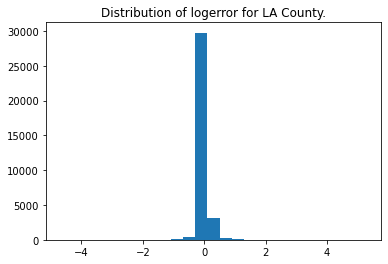

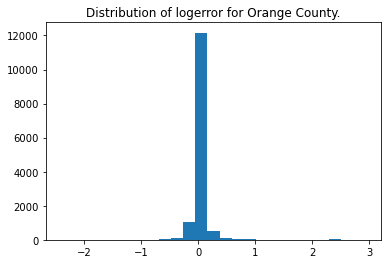

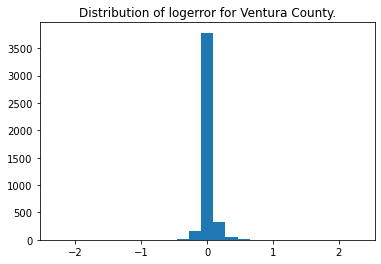

In [14]:
#Loop through my counties and plot the distribution of the target variable
county_list = ['LA County', 'Orange County', 'Ventura County']

for county in county_list:
    print('Variance of logerror for {}.'.format(county))
    print(df[df['county'] == county].logerror.var())
    
    plt.figure()
    plt.title('Distribution of logerror for {}.'.format(county))
    plt.hist(df[df['county'] == county].logerror, bins=25)

<AxesSubplot:xlabel='county', ylabel='logerror'>

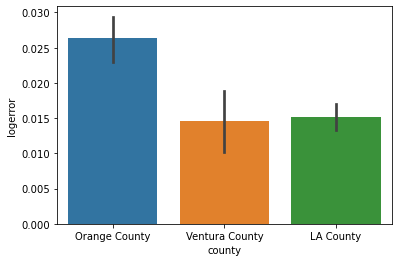

In [15]:
#Compare the average log error between counties
sns.barplot(x='county', y='logerror', data=df)

In [16]:
#Conduct an ANOVA test between the counties
f_county, p_county = stats.f_oneway(df[df['county'] == 'LA County'].logerror,
                                    df[df['county'] == 'Orange County'].logerror,
                                    df[df['county'] == 'Ventura County'].logerror)

f_county, p_county

(20.68128383864818, 1.0514322760520065e-09)

In [17]:
#Compare my p value to alpha
if p_county < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


## Question 2

What is driving the difference in log error between the counties? Maybe Orange County has homes of all ages, and that makes it difficult to correctly predict the price!

Null hypothesis: The average age of homes in Orange County is the same as the overall age of homes in the dataset.  
Alternative hypothesis: The average age of homes in Orange County is different from the overall mean of the dataset.

<AxesSubplot:xlabel='county', ylabel='age'>

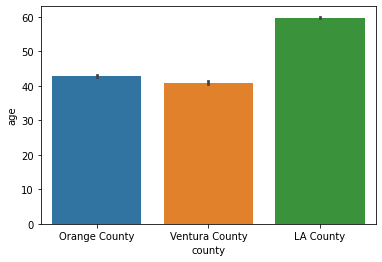

In [18]:
#The average age of houses in each county
sns.barplot(x='county', y='age', data=df)

<AxesSubplot:xlabel='county', ylabel='age'>

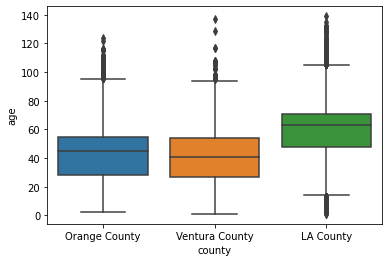

In [19]:
#A better way to visualize the distribution of ages
sns.boxplot(x='county', y='age', data=df)

In [20]:
print(df[df['county'] == 'Orange County'].age.var())
print(df['age'].var())

338.7026725384371
533.6540573562283


In [21]:
#Test the average age of a home in Orange County against the overall mean
t_age, p_age = stats.ttest_1samp(df[df['county'] == 'Orange County'].age,
                                 df['age'].mean())

t_age, p_age

(-70.26703860754, 0.0)

In [22]:
#Test my hypothesis
if p_age < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


In [23]:
#Conduct the same test for LA County
t_age2, p_age2 = stats.ttest_1samp(df[df['county'] == 'LA County'].age,
                                 df['age'].mean())

t_age2, p_age2

(49.36224767583628, 0.0)

## Question 3

What else could be driving the greater log error in Orange County compared to the other counties? My next guess is home price.

Null hypothesis: Home prices in Orange County are the same as the average home price for the dataset.  
Alternative hypothesis: Home prices in Orange County are significantly different from the mean home price for the dataset.

<AxesSubplot:xlabel='county', ylabel='taxvaluedollarcnt'>

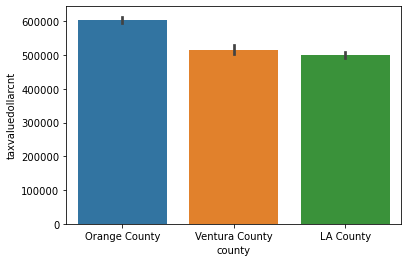

In [24]:
#Compare average home price between counties
sns.barplot(x='county', y='taxvaluedollarcnt', data=df)

In [25]:
print(df[df['county'] == 'Orange County'].taxvaluedollarcnt.var())
print(df['taxvaluedollarcnt'].var())

381421216641.2816
565246760515.6036


In [26]:
#Compare the home price in Orange County to overall home price in the dataset
t_price, p_price = stats.ttest_1samp(df[df['county'] == 'Orange County'].taxvaluedollarcnt,
                                     df['taxvaluedollarcnt'].mean())

t_price, p_price

(14.324220784824073, 3.2565913104654006e-46)

In [27]:
#Test my hypothesis against alpha
if p_price < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


## Question 4

Is there a correlation between the price of a home and its log error?

Null hypothesis: There is no correlation between price and log error.  
Alternative hypothesis: There is a relationship between price and log error.

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

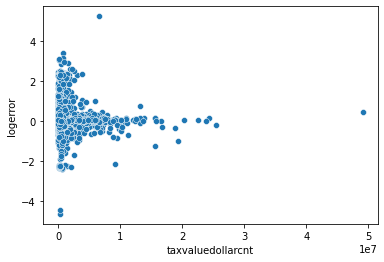

In [28]:
#Scatterplot of logerror as a function of home price
sns.scatterplot(x='taxvaluedollarcnt', y='logerror', data=df)

In [29]:
#Test for correlation between the two
corr_value, p_value = stats.pearsonr(df['taxvaluedollarcnt'],
                                     df['logerror'])

corr_value, p_value

(-0.00203998931118565, 0.6407838188336151)

In [30]:
#Test my hypothesis
if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


## Question 5

Is there a significant difference in log error between lower value homes (1 million and under) and higher value homes (greater than 1 million)?

Null hypothesis: There will be no difference in average log error between these two groups.  
Alternative hypothesis: There will be a difference in average log error between the two groups.

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

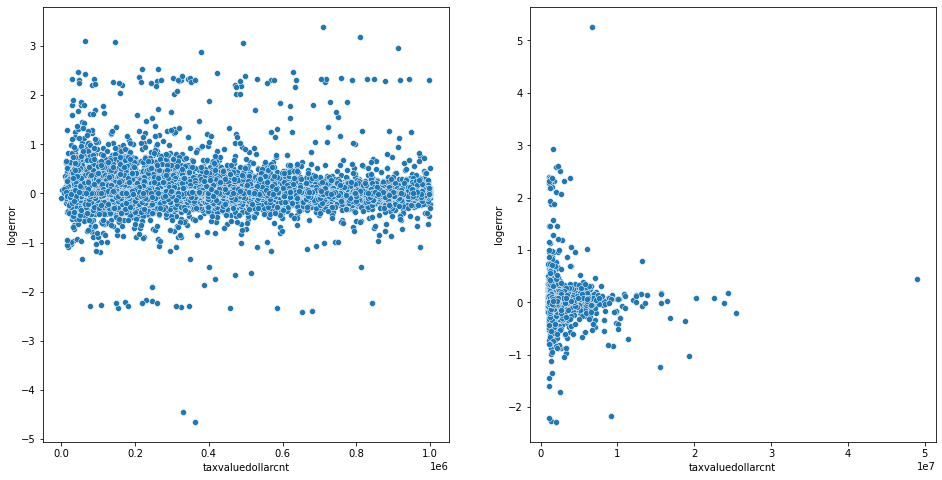

In [31]:
#Plot the subsets of my data based on home price
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.scatterplot(x='taxvaluedollarcnt', y='logerror',
                data=df[df['taxvaluedollarcnt'] < 1_000_000])

plt.subplot(122)
sns.scatterplot(x='taxvaluedollarcnt', y='logerror',
                data=df[df['taxvaluedollarcnt'] >= 1_000_000])

In [32]:
#Check for equal variance between subsets
print(df[df['taxvaluedollarcnt'] < 1_000_000].logerror.var())
print(df[df['taxvaluedollarcnt'] >= 1_000_000].logerror.var())

0.02829086792070693
0.057517794624891816


In [33]:
#Run the t-test
t_value, p_value2 = stats.ttest_ind(df[df['taxvaluedollarcnt'] < 1_000_000].logerror,
                                    df[df['taxvaluedollarcnt'] >= 1_000_000].logerror)

t_value, p_value2

(-2.0596662219897564, 0.03943539659767351)

In [34]:
#Test my hypothesis
if p_value2 < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.
